In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target
print(wine.target_names)
df.head()

['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
from sklearn.model_selection import train_test_split
X_data = wine.data
y_data = wine.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                test_size=0.2, random_state= 156)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(142, 13) (36, 13)
(142,) (36,)


In [5]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)
accuracy = accuracy_score(y_test , pred)
print('예측 정확도: {0:.4f}'.format(accuracy))
print(f1_score(y_test, pred, average='macro'))
print( roc_auc_score(y_test, pred_proba, multi_class='ovo'))

예측 정확도: 0.9722
0.9731615673644659
0.9821428571428572


In [ ]:
#그래프 그리기: 사이킷런(plot_tree), Graphviz 방식
from sklearn.tree import plot_tree
plt.figure(figsize=(12,10))
plot_tree(dt_clf, filled=True, feature_names=wine.feature_names, class_names=list(wine.target_names),fontsize=8)

In [7]:
# 과적합 확인하는 방법
# cross_val_score: 학습데이터 평가점수 vs 테스트데이터 평가점수 --> 비슷해야함
# max_dept 적은 수 /min_samples_split: split 하는 최소 샘플 수 /min_samples_leaf: 리프노드에 있을 최소 샘플갯수

from sklearn.model_selection import cross_val_score
dt_clf=DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
scores=cross_val_score(dt_clf, X_train, y_train, scoring='accuracy', cv=5)
print('교차검증 평균 평가',scores.mean())
print('테스트데이터 평가점수',accuracy_score(y_test, dt_clf.predict(X_test)))

# 점수 차이가 많지않으므로 학습이 제대로 됨/ 과적합 아님

교차검증 평균 평가 0.8517241379310345
테스트데이터 평가점수 0.9722222222222222


In [8]:
from sklearn.model_selection import GridSearchCV
dt_clf=DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'],'max_depth':[None, 2, 3, 5, 7], 
                'min_samples_split':[10,20,40,10,50],'min_samples_leaf':[1,3,5,7]}
grid_dt = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring='f1_macro', verbose=True)
grid_dt.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']]

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.853140,64
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.812317,124
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.803226,140
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.846502,67
4,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.765369,185
...,...,...,...
195,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.878316,21
196,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.878316,21
197,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.812746,119
198,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.878316,21


In [9]:
model = grid_dt.best_estimator_
pred = model.predict(X_test)
accuracy_score(y_test, pred)

1.0

In [10]:
print('GridSearchCV 최적 파라미터 :', grid_dt.best_params_)
print(f'GridSearchCV 최고 정확도 : {grid_dt.best_score_:.4f}')

GridSearchCV 최적 파라미터 : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 20}
GridSearchCV 최고 정확도 : 0.8980


In [11]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 20}

In [12]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

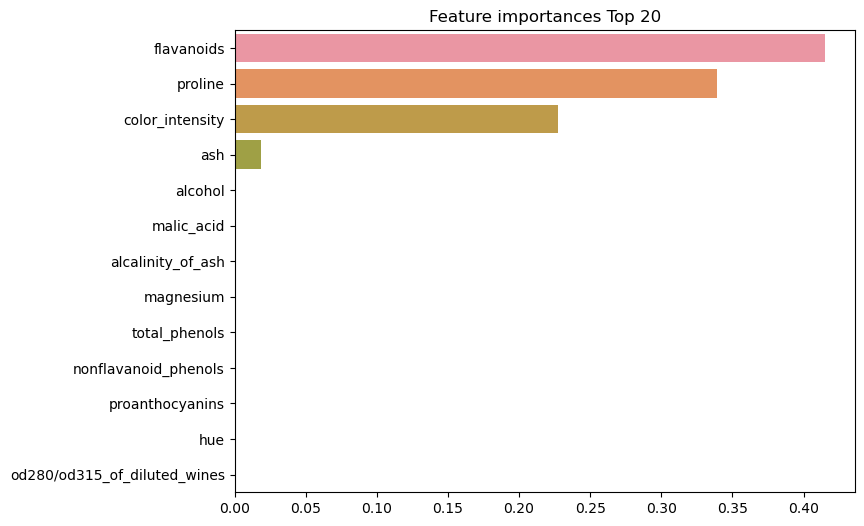

In [13]:
# 피처 중요도 그래프
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=wine.feature_names )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [14]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

In [15]:
x1=df.iloc[:, :-1]
x2=df[['alcohol','malic_acid','ash','alcalinity_of_ash']]
y=df.iloc[:,-1]
X1_train, X1_test, y_train, y_test = train_test_split(x1, y, 
                                test_size=0.2, random_state= 0)
X2_train, X2_test, y_train, y_test = train_test_split(x2, y, 
                                test_size=0.1, random_state= 0)

In [39]:
t_clf1 = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_leaf=1, min_samples_split=40,
                                random_state=0)

dt_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_leaf=1, min_samples_split=40,
                                random_state=0)

In [18]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# from sklearn.datasets import 

In [19]:
# VotingClassifier 보팅분류기
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [32]:
from sklearn.ensemble import RandomForestClassifier
rd_clf=RandomForestClassifier()
lr_clf = LogisticRegression(solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=0)
knn_clf= KNeighborsClassifier()
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('DT',dt_clf), 
                                      ('KNN', knn_clf)], voting='soft')  # DT,LR 등앞에 맘대로 아무렇게나 넣어도 된

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                    test_size=0.2 , random_state= 0)
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print(f'Voting 분류기 정확도: {accuracy_score(y_test,pred):.4f}')

Voting 분류기 정확도: 0.9649


In [33]:
vo_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(solver='liblinear')),
                             ('DT', DecisionTreeClassifier(random_state=0)),
                             ('KNN', KNeighborsClassifier())],
                 voting='soft')

In [34]:
classifiers = [lr_clf, dt_clf, knn_clf]
for clf in classifiers:
    clf.fit(X_train , y_train)
    pred = clf.predict(X_test)
    class_name= clf.__class__.__name__
    print(f'{class_name} 정확도: {accuracy_score(y_test, pred):.4f}')

LogisticRegression 정확도: 0.9561
DecisionTreeClassifier 정확도: 0.9123
KNeighborsClassifier 정확도: 0.9386


In [ ]:
classifiers = [lr_clf, dt_clf, rd_clf]
preds=[]
for clf in classifiers:
    clf.fit(X_train , y_train)
    pred = clf.predict_proba(X_test)
    preds.append(pred_proba)
pred_probas= np.sum(preds, axis=0)
(pred_probas[:-1] >= 1.5).astype(int)

In [ ]:
plot_tree(vo_clf.estimators_[1])  # 학습된 알고리즘

In [ ]:
vo_clf.named_estimators_['DT']  # 학습된 알고리즘들

In [ ]:
## 배깅 분류기 - 랜덤포레스트 / 많이 사용함-간단함

In [24]:
# 랜덤포레스트 RandomForestClassifier  == 그냥 해보림
from sklearn.ensemble import RandomForestClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                    test_size=0.2 , random_state= 0)
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print(f'랜덤 포레스트 정확도: {accuracy:.4f}')

랜덤 포레스트 정확도: 0.9649


In [25]:
 # 배깅기법 사용/ 랜덤포레스트와 거의 비슷  => 랜덤포레스르을 사용할 것
from sklearn.ensemble import BaggingClassifier 

ba_clf=BaggingClassifier(estimator=dt_clf,n_estimators=100, max_samples=0.8, max_features=0.8 )
ba_clf.fit(X_train, y_train)
pred=ba_clf.predict(X_test)

accuracy_score(y_test, pred)

0.956140350877193

In [26]:
# 랜덤포레스트와 비교 _ 차이가 별로 없음
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test , pred)

0.9649122807017544

In [27]:
rf_clf.feature_importances_

array([0.03699612, 0.01561296, 0.06016409, 0.0371452 , 0.0063401 ,
       0.00965994, 0.0798662 , 0.08669071, 0.00474992, 0.00417092,
       0.02407355, 0.00548033, 0.01254423, 0.03880038, 0.00379521,
       0.00435162, 0.00452503, 0.00556905, 0.00610635, 0.00528878,
       0.09556258, 0.01859305, 0.17205401, 0.05065305, 0.00943096,
       0.01565491, 0.02443166, 0.14202709, 0.00964898, 0.01001304])

<Axes: title={'center': 'Feature importances Top 20'}>

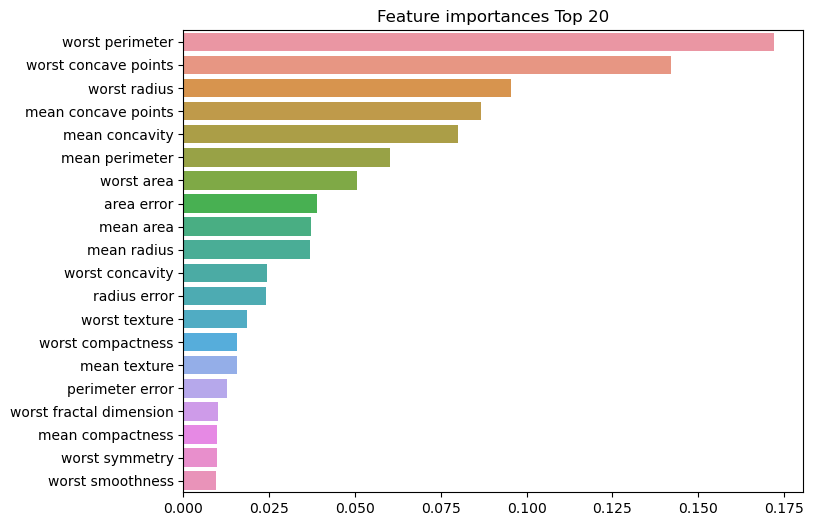

In [28]:
# 중요도 그래프 그리기 
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=cancer.feature_names )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)

In [29]:
# 랜덤포레스트 파이퍼 파라미터 튜닝 GridSearchCV
params = {'n_estimators':[100], 'max_depth' : [6, 8, 10, 12], 
            'min_samples_leaf' : [8, 12, 18 ],'min_samples_split' : [8, 16, 20]}
rf_clf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=3, n_jobs=-1, verbose=True)
grid_cv.fit(X_train , y_train)

print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
print(f'GridSearchCV 최고 정확도: {grid_cv.best_score_:.4f}')
model = grid_cv.best_estimator_
pred = model.predict(X_test)
accuracy_score(y_test, pred)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
GridSearchCV 최적 파라미터: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.9385


0.9649122807017544

In [30]:
# 랜텀포레스트와 디시젼트리와의 비교 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                    test_size=0.2 , random_state= 0)

dt_clf=DecisionTreeClassifier(random_state=0)
rf_clf=RandomForestClassifier(random_state=0)

dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)

pred1=dt_clf.predict(X_test)
pred2=rf_clf.predict(X_test)

print('DecisionTree 정확도', accuracy_score(y_test, pred1))
print('RandomForest 정확도', accuracy_score(y_test, pred2))

DecisionTree 정확도 0.9122807017543859
RandomForest 정확도 0.9649122807017544


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                    test_size=0.2 , random_state= 0)
gb_clf = GradientBoostingClassifier( n_estimators=200, random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f'GBM 정확도: {gb_accuracy:.4f}')

GBM 정확도: 0.9737
